# Emotion Classification Using Tweets

## Introduction

Emotion Classification with Tweets is a way to understand the feelings people express on Twitter. Tweets are short messages people share online, and they often contain emotions like happiness, sadness, or anger.

By analyzing Tweets, we can teach computers to recognize and categorize these emotions automatically. This process is called emotion classification. It helps us understand how people are feeling on social media and can be useful for things like understanding public opinion, monitoring brand sentiment, or even detecting potential crises.

Using special computer programs and techniques, we can analyze the words and language used in Tweets to determine the emotions they convey. This allows us to classify Tweets into different emotion categories, giving us insights into the overall emotional tone of conversations happening on Twitter.

Emotion classification with Tweets is a powerful tool for understanding human behavior and sentiment in the digital age. It enables us to gain valuable insights from the vast amount of data shared on social media platforms like Twitter, helping us make better decisions and understand the world around us.

**Why is it a deep-learning task?**

Deep learning is often used for emotion detection because it's really good at handling tricky things like emotions. Here's why:

1. Emotions are kind of complicated and depend a lot on the situation. Traditional ways of teaching computers to recognize emotions struggle with this complexity. Deep learning, especially neural networks, are great at spotting subtle patterns in lots of data. 

2. With deep learning, the model learns on its own. That's super handy for emotion detection because emotions can be expressed in lots of different ways, and we might not always know exactly what to look for.

3. Deep learning models can handle a ton of data and big, complex tasks. This makes them perfect for analyzing huge amounts of text from places like social media or customer feedback. They can sift through all that info to find patterns in how people are feeling, even when there's a lot of it.

So, deep learning is a powerful way to understand emotions in text. It's used in lots of different fields because it can handle big jobs and find important details in all kinds of data.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud
# Download NLTK resources (stopwords and tokenizer)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

warnings.filterwarnings('ignore')

/tmp/ipykernel_129460/2248248088.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-17 03:14:39.206588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 03:14:39.206764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 03:14:39.208218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable

# (1) Dataset

We used the dataset from Kaggle for Emotion Classification which consists of Tweets and emotion labels of Tweets. This dataset is publically available and it has two main attributes.

1. Tweets `tweet` (Actual text of tweet extracted from Twitter)

2. Emotion `label` (Integer value attached with Tweet)

There are total 6 emotions represented in data:

1. Sadness (0)

2. Joy (1)

3. Love (2)

4. Anger (3)

5. Fear (4)

6. Surprise (5)

There are total of approximately 417k Tweets in the data.

**Citation:**

Elgiriyewithana, N. (2024, February). Emotions. Where Words Paint the Colors of Feelings.
    https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data

# (2) Exploratory Data Analysis

It is always important to analyze data before building the model. We performed some analysis on our data which is presented below.

In [2]:
# Load your dataset using pandas
data = pd.read_csv('text.csv')

In [3]:
data.head(15)

,id,tweet,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [4]:
# Summary of data
data.describe()

,id,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


## (2.1) Tweet Length Analysis & Emotion Distribution

Tweet length analysis looks at how long Tweets are. It helps us understand how short or long messages are on Twitter. By studying Tweet lengths, we can see patterns in our data and build models accordingly.

In [5]:
# Tweet length analysis
data["tweet-length"] = data["tweet"].map(len)
data.describe()

,id,label,tweet-length
count,416809.000000,416809.000000,416809.000000
mean,208404.000000,1.554271,97.028397
std,120322.538513,1.490453,56.198232
min,0.000000,0.000000,2.000000
25%,104202.000000,0.000000,54.000000
50%,208404.000000,1.000000,86.000000
75%,312606.000000,3.000000,128.000000
max,416808.000000,5.000000,830.000000


In [6]:
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}


data['Emotion'] = data['label'].map(label_map)

Now we will check how these emotions are distributed in our data.

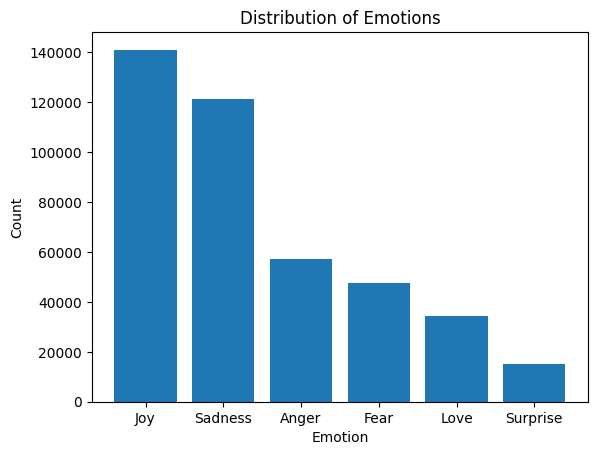

In [7]:
# Emotion distribution
emotion_counts = data['Emotion'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

From the graph displayed above, it's evident that the most prevalent Tweets convey joy, comprising nearly 140,000 instances. Meanwhile, Tweets expressing sadness total around 12,000. Consequently, we observe that the predominant emotions in Tweets are either happiness or sadness, with other emotions being less frequent in comparison. Notably, Tweets depicting surprise are the least common, numbering only 2,000 occurrences.

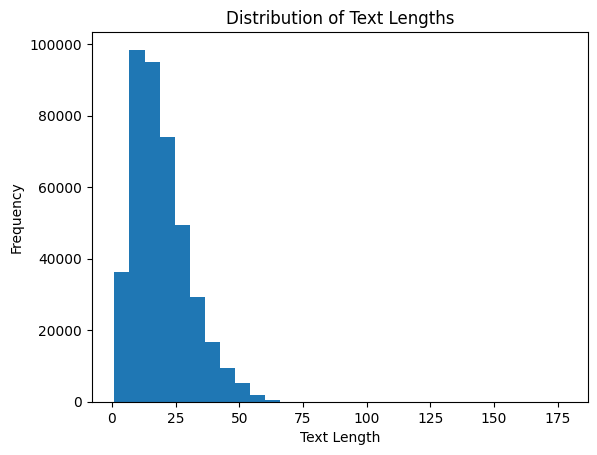

In [8]:
# Text length analysis
data['text_length'] = data['tweet'].apply(lambda x: len(x.split()))
plt.hist(data['text_length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

As we can see that most of the Tweet length lies between 0 and 50.

## (2.2) Word Cloud

Let us observe the word cloud for most common words in dataset.

In [9]:
from collections import Counter

# Tokenize tweets
all_words = ' '.join(data['tweet']).split()
word_freq = Counter(all_words)

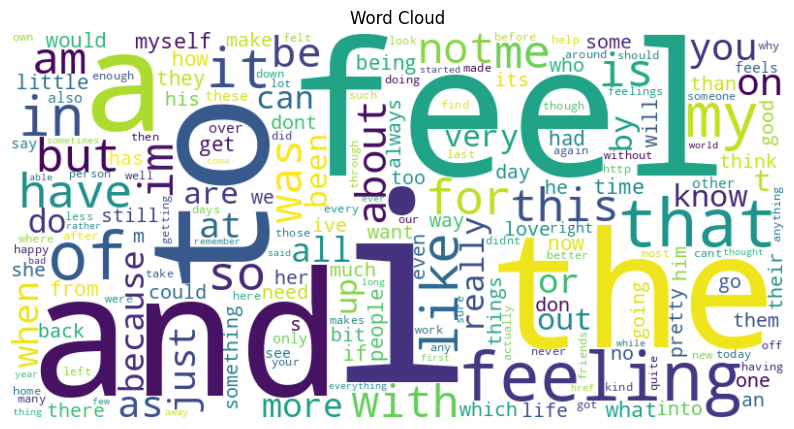

In [10]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

We can see that most common words represent all categories or they stop words like "feel", "the", "and", "people", "myself", "really". So this means that the most common words do not play a decisive role and less common words will help us to perform classification and recognize emotions.

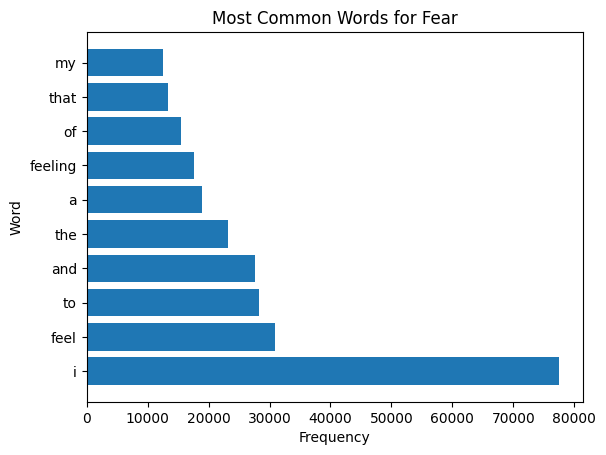

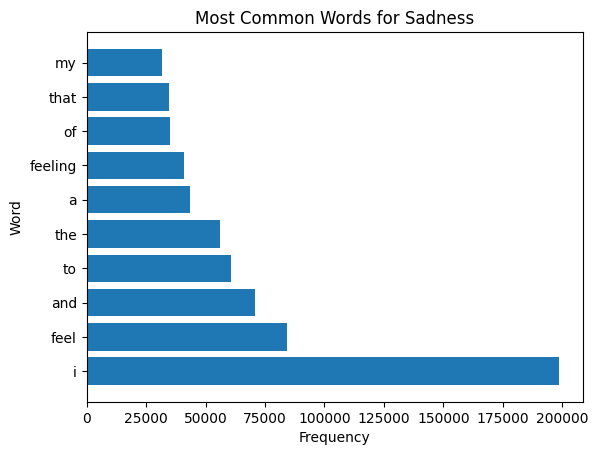

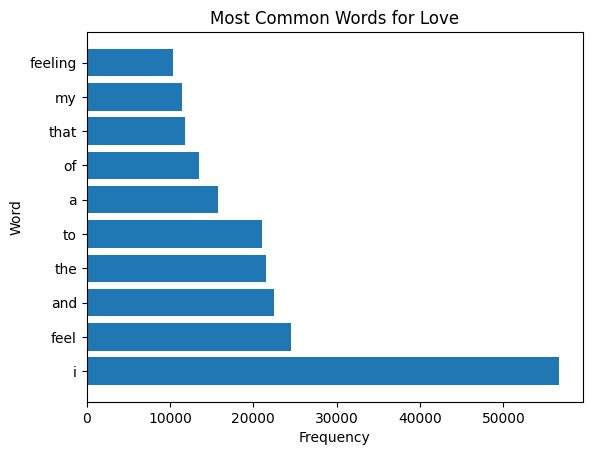

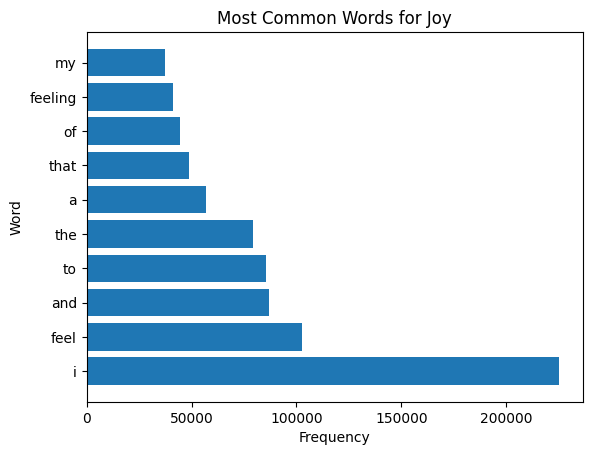

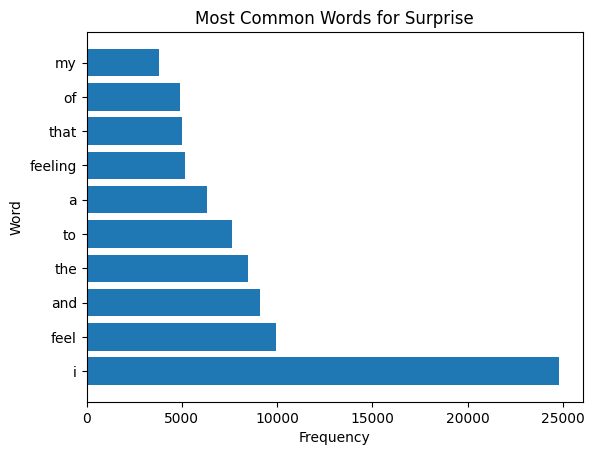

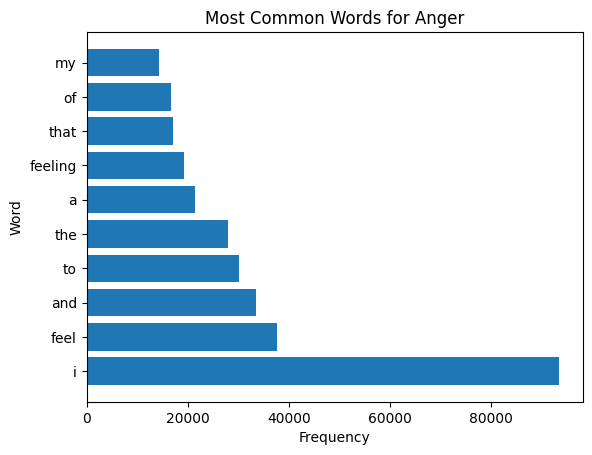

In [11]:
# Word frequency by emotion
emotion_word_freq = {}
for emotion in data['Emotion'].unique():
    emotion_tweets = ' '.join(data[data['Emotion'] == emotion]['tweet']).split()
    emotion_word_freq[emotion] = Counter(emotion_tweets)

# Plot word frequency for each emotion
for emotion, word_freq in emotion_word_freq.items():
    common_words = word_freq.most_common(10)  # Get top 10 most common words
    plt.barh(range(10), [count for word, count in common_words], tick_label=[word for word, count in common_words])
    plt.title(f'Most Common Words for {emotion}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

It is clear from the figures above that the most common words in all categories are the same, which indicates problems in our data. Here we will explain those problems and find solutions for them.

## (2.3) Problem Identified By EDA

Finding that the most common words belonging to each category are almost the same poses a significant challenge in emotion detection and classification tasks. Here's why it's problematic and how it serves as a basis for preprocessing:

1. When the most common words across different emotion categories overlap significantly, it indicates that these words are not unique to a particular emotion. This ambiguity makes it challenging for the model to accurately distinguish between emotions based solely on these common words. For example, words like "happy" or "sad" might appear in both joyful and sorrowful contexts, leading to confusion for the model.

2. Classification Difficulty: Emotion classification models rely on identifying distinct patterns and features associated with each emotion category. However, if the most common words are similar across categories, the model may struggle to differentiate between them effectively. This can result in lower classification accuracy and reliability.

To address these challenges and improve the performance of emotion detection models, preprocessing techniques can be applied.

# (3) Data Preprocessing

As it is clear from our data analysis that our data is not clean and there are a lot of stop words or meaningless words in our Tweets. There is another problem where different forms of words are used like feel, and feeling and they are considered as different words. So we applied the following pre-processing steps to our data before applying the model.

**1. Tokenization, Stop Word Removal, and Stemming:**

•	Each text entry in the dataset is broken down into individual words through tokenization.

•	Commonly occurring words that do not carry significant meaning, known as stop words, are removed to focus on content-bearing words.

•	Stemming is applied to reduce words to their base or root form, simplifying the vocabulary and improving consistency.

**2. Numerical representation and Padding:**

•	After cleaning, the words are converted into numerical representations.

•	These numerical representations are then padded to ensure that all sequences have the same length, facilitating uniform processing by machine learning models.

Overall, these preprocessing steps aim to standardize and clean the textual data, making it suitable for training various machine learning or deep learning models. The cleaned and standardized data serves as input for tasks such as sentiment analysis, text classification, or sequence prediction. Adjustments can be made to parameters based on the specific characteristics of the data and the requirements of the downstream tasks.

In [12]:
# Split data into features (X) and labels (y)
X = data['tweet']
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize tokenizer and stemmer
tokenizer = Tokenizer()
stemmer = PorterStemmer()

# Tokenize, remove stop words, and apply stemming
X_train_processed = []
X_test_processed = []
stop_words = set(stopwords.words('english'))
for text in X_train:
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    X_train_processed.append(' '.join(filtered_words))

for text in X_test:
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    X_test_processed.append(' '.join(filtered_words))

# Tokenize the processed text and pad sequences
tokenizer.fit_on_texts(X_train_processed)
X_train = tokenizer.texts_to_sequences(X_train_processed)
X_test = tokenizer.texts_to_sequences(X_test_processed)

maxlen = 100  # Adjust maxlen according to your text length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# (4) Model

We used a stacked LSTM model to classify the emotions in Tweets. The stacked LSTM setup is a powerful way to organize a neural network, especially for working with things like text or time-based data. It's like a stack of blocks, with each block being an LSTM layer. These blocks process data one after the other and pass their findings to the next block. This setup helps the model understand more complex patterns in the data. Stacked LSTMs are really good at understanding long-term patterns and relationships in data, which makes them great for tasks like understanding language, analyzing feelings in text, or predicting future values in a time series. By stacking multiple LSTM layers, the model can learn both short-term and long-term patterns much better than if it had just one layer.

**Architecture:**

**1. Embedding Layer:** The first layer is an embedding layer, which transforms input tokens into dense vectors of fixed size (embedding_dim). This layer helps in representing words in a continuous vector space and capturing semantic relationships between them.

**2. LSTM Layers:** The model then includes two LSTM (Long Short-Term Memory) layers.

Layer 1: The first LSTM layer has 4 units and is configured to return sequences, allowing it to output sequences of hidden states for each timestep. 

Layer 2: The second LSTM layer also has 4 units and processes the sequence output from the previous layer to learn higher-level representations of the input sequence.

**3. Dense Layers:** Following the LSTM layers are two fully connected (Dense) layers. The first dense layer has 8 units, enabling the model to learn complex patterns in the data. The final dense layer has units equal to the number of classes in the classification task (determined by the length of label_encoder.classes_), with softmax activation to output class probabilities.

Overall, this architecture leverages embedding and LSTM layers to capture sequential dependencies in the input data and feed them into fully connected layers for classification. It's suitable for tasks like sentiment analysis or emotion classification where the input consists of sequences of text data.

In [14]:
embedding_dim = 100  # Adjust embedding_dim according to your preference

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=4,return_sequences=True))
model.add(LSTM(units=4))
model.add(Dense(8))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-04-17 03:16:36.628898: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (100)


Here is the summary of the model:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          4650100   
                                                                 
 lstm (LSTM)                 (None, 100, 4)            1680      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 144       
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
Total params: 4652018 (17.75 MB)
Trainable params: 4652018 (17.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# (5) Results & Analysis

In [16]:
epochs=5
history=model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2)

Epoch 1/5
8337/8337 [==============================] - 687s 82ms/step - loss: 0.4462 - accuracy: 0.8381 - val_loss: 0.2464 - val_accuracy: 0.9041
Epoch 2/5
8337/8337 [==============================] - 776s 93ms/step - loss: 0.2018 - accuracy: 0.9153 - val_loss: 0.2135 - val_accuracy: 0.9071
Epoch 3/5
8337/8337 [==============================] - 656s 79ms/step - loss: 0.1695 - accuracy: 0.9245 - val_loss: 0.2189 - val_accuracy: 0.9061
Epoch 4/5
8337/8337 [==============================] - 663s 80ms/step - loss: 0.1534 - accuracy: 0.9297 - val_loss: 0.2222 - val_accuracy: 0.9008
Epoch 5/5
8337/8337 [==============================] - 655s 79ms/step - loss: 0.1429 - accuracy: 0.9327 - val_loss: 0.2263 - val_accuracy: 0.9011


## (5.1) Accuracy

Here are the details of model performance:

In [30]:
y_pred = np.argmax(model.predict(X_test),axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2606/2606 [==============================] - 30s 11ms/step
Accuracy: 0.9022696192509777
Precision: 0.9013034954408009
Recall: 0.9022696192509777
F1 Score: 0.9012728987041048


These metrics provide an evaluation of the performance of a classification model. Here's a brief explanation of each:

**1. Accuracy:** Accuracy measures the proportion of correctly classified instances out of the total number of instances. In this case, an accuracy of 0.902 indicates that approximately 90.2% of the instances were classified correctly by the model.

**2. Precision:** Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.901 indicates that around 90.1% of the instances predicted as positive were indeed positive.

**3. Recall:** Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances. A recall of 0.902 indicates that approximately 90.2% of the actual positive instances were correctly identified by the model.

**4. F1 Score:** The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is a single metric that captures both precision and recall. An F1 score of 0.901 suggests that the model achieves a good balance between precision and recall, with higher values indicating better performance.

Overall, these metrics provide a comprehensive evaluation of the model's performance in terms of accuracy, precision, recall, and the balance between precision and recall as captured by the F1 score.

Here are the plots for accuracy and loss of training and validation data we can see that both plots show convergence which shows the goodness of our model:

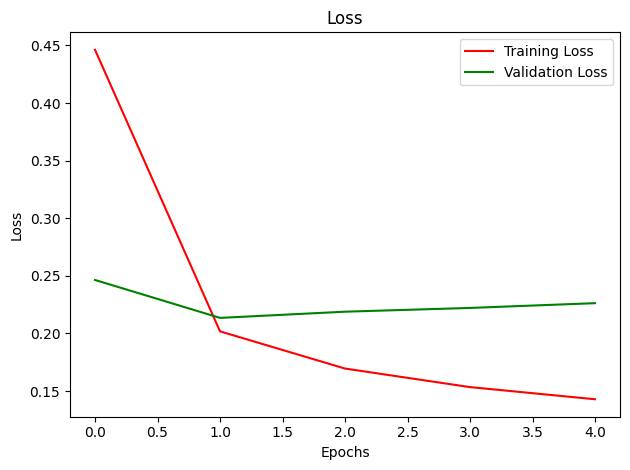

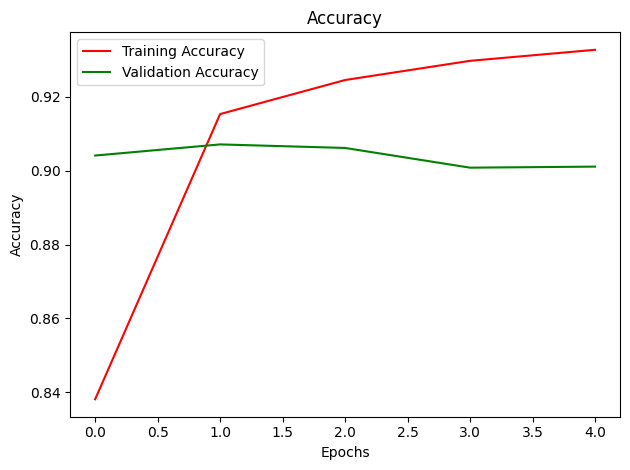

In [33]:
x=list(range(0,epochs))
plt.plot(x,history.history['loss'], 'r', label='Training Loss')
plt.plot(x, history.history['val_loss'], 'g', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

plt.plot(x,history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(x, history.history['val_accuracy'], 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

## (5.2) Confusion Matrix

83362
[[23150   214    56   417   289    75]
 [  171 26410  1041   122   115   305]
 [  135  1918  4774    80    16     6]
 [  577   103    38 10452   270     1]
 [  435    72     1   455  8080   551]
 [   27   117     0     4   536  2349]]


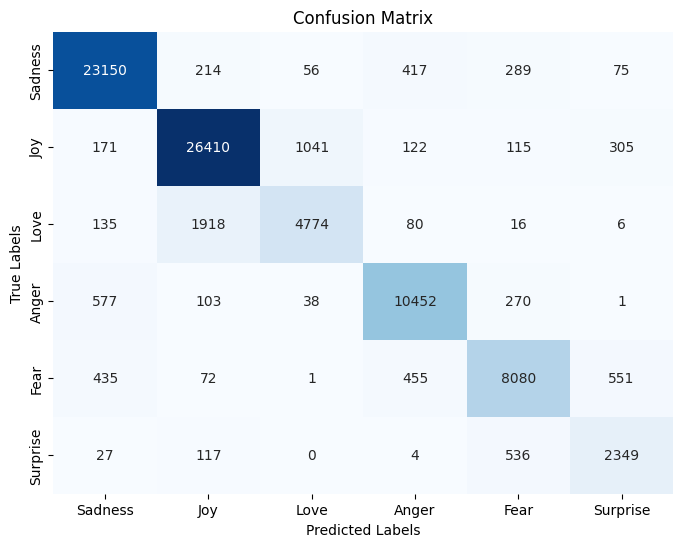

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(len(y_pred))
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(6) + 0.5, labels=['Sadness','Joy','Love','Anger','Fear','Surprise'])
plt.yticks(ticks=np.arange(6) + 0.5, labels=['Sadness','Joy','Love','Anger','Fear','Surprise'])
plt.show()

# (6) Conclusion & Discussion

In conclusion, our project on emotion detection from textual data has provided valuable insights into the performance of our classification model. Through the analysis of the confusion matrix, we observed that the model generally performed well, accurately predicting the majority of instances. However, disparities in accuracy were noted among classes, with larger datasets correlating with higher accuracy rates. To address the observed discrepancies and improve overall performance, implementing data balancing techniques is recommended. Moving forward, further refinement of the model's architecture, hyperparameters, and feature engineering approaches may also contribute to enhancing its effectiveness in accurately detecting emotions from textual data. Overall, this project serves as a foundational step towards developing more robust and reliable emotion detection systems with practical applications in various domains.